In [1]:
# Importing Libs: 
import ast # turning list to str
import numpy as np # for calculation
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from datasets import load_dataset

# Setting Dataset
ds = load_dataset("lukebarousse/data_jobs")
ds = ds['train'].to_pandas()
data = ds.copy()




In [2]:
data.columns
           

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

## Data Inspection:

In [3]:
# Check Dups: 
data.duplicated().sum()

101

<Axes: >

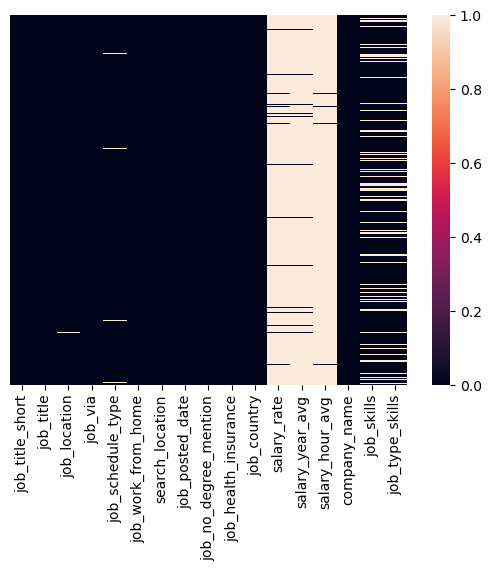

In [4]:
# Check Missing Values
data.isnull().sum()
sns.heatmap(data.isnull(), yticklabels=False)

In [5]:
# Check Data Types
data.dtypes

job_title_short           object
job_title                 object
job_location              object
job_via                   object
job_schedule_type         object
job_work_from_home          bool
search_location           object
job_posted_date           object
job_no_degree_mention       bool
job_health_insurance        bool
job_country               object
salary_rate               object
salary_year_avg          float64
salary_hour_avg          float64
company_name              object
job_skills                object
job_type_skills           object
dtype: object

In [6]:
# Check Unique Values
data['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

## Handle Duplicates

In [7]:
# Drop Dups: 
# Based of company name because some company publish jobs with diffrent name
data.drop_duplicates(subset='company_name',inplace=True)

## Handle Missing Data

In [ ]:
# Filling the missed data salary_year_avg and salary_hour_avg with median one
data['salary_year_avg'].fillna(data['salary_year_avg'].median(), inplace=True)
data['salary_hour_avg'].fillna(data['salary_hour_avg'].median(), inplace=True)

<Axes: >

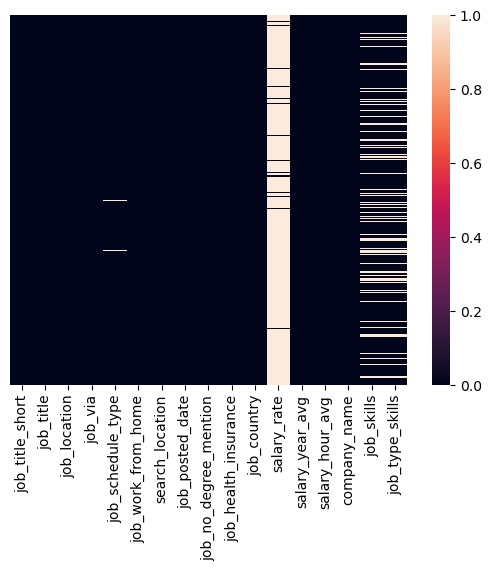

In [9]:
data.isnull().sum()
sns.heatmap(data.isnull(), yticklabels=False)

## Fix Data Type

In [10]:
data.dtypes

job_title_short           object
job_title                 object
job_location              object
job_via                   object
job_schedule_type         object
job_work_from_home          bool
search_location           object
job_posted_date           object
job_no_degree_mention       bool
job_health_insurance        bool
job_country               object
salary_rate               object
salary_year_avg          float64
salary_hour_avg          float64
company_name              object
job_skills                object
job_type_skills           object
dtype: object

In [11]:
# job_posted_date           object(str) to datetime
data['job_posted_date'] = pd.to_datetime(data['job_posted_date'])


In [12]:
# job_skills                object(str) to list

data['job_skills'] = data['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [13]:
data.dtypes

job_title_short                  object
job_title                        object
job_location                     object
job_via                          object
job_schedule_type                object
job_work_from_home                 bool
search_location                  object
job_posted_date          datetime64[ns]
job_no_degree_mention              bool
job_health_insurance               bool
job_country                      object
salary_rate                      object
salary_year_avg                 float64
salary_hour_avg                 float64
company_name                     object
job_skills                       object
job_type_skills                  object
dtype: object

## Standarize Text

In [14]:
# job_skills exploding the list to be for each one

data = data.explode('job_skills')
data.sample(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
52171,Data Engineer,Lead Data Engineer,"London, UK",via My ArkLaMiss Jobs,Full-time,False,United Kingdom,2023-02-25 06:51:37,True,False,United Kingdom,None,104668.0,41.0,FutureLearn Ltd,snowflake,"{'cloud': ['snowflake'], 'databases': ['mysql'..."
120101,Data Scientist,Biomass Remote Sensing Data Scientist,"The Hague, Netherlands",via LinkedIn,Full-time,False,Netherlands,2023-10-06 08:17:17,False,False,Netherlands,None,104668.0,41.0,Space4Good,python,"{'programming': ['python', 'javascript']}"
88443,Business Analyst,Vendor Master Analyst,"Pasig, Metro Manila, Philippines",via LinkedIn,None,False,Philippines,2023-05-11 00:20:18,True,False,Philippines,None,104668.0,41.0,ESCO Corporation,sap,"{'analyst_tools': ['excel', 'sap'], 'cloud': [..."
722700,Senior Data Scientist,Senior AI Data Scientist,"Fort Lauderdale, FL",via Jobs Trabajo.org,Full-time,False,"Florida, United States",2023-08-22 21:06:40,False,True,United States,None,104668.0,41.0,Abatech,r,"{'programming': ['python', 'r']}"


## Adds Column

In [15]:
## Adding Month Column for `How are in-demand skills trending`

data['job_posted_month'] = data['job_posted_date'].dt.month

In [16]:
data.sample(4)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
698085,Data Engineer,Python and SQL Data Engineer,"Jakarta, Indonesia",via LinkedIn,Full-time,False,Indonesia,2023-10-10 03:37:10,True,False,Indonesia,None,104668.0,41.0,Persuasion Technologies Sdn Bhd,bigquery,"{'cloud': ['bigquery', 'azure', 'aws'], 'libra...",10
45212,Data Scientist,Data Scientist,"Houston, TX",via Trabajo.org,Full-time,False,"Texas, United States",2023-02-06 06:06:18,False,False,United States,None,104668.0,41.0,io173,sas,"{'analyst_tools': ['sas', 'spss'], 'cloud': ['...",2
235569,Data Scientist,Strategic Analytics Lead,"Nairobi, Kenya",via Recruit.net,Full-time,False,Kenya,2023-09-19 00:08:28,True,False,Kenya,None,104668.0,41.0,Apollo Agriculture,excel,"{'analyst_tools': ['excel'], 'programming': ['...",9
537032,Senior Data Engineer,Senior Data Engineer,"Küsnacht, Switzerland",via BeBee Schweiz,Full-time,False,Switzerland,2023-09-28 20:05:14,True,False,Switzerland,None,104668.0,41.0,2Xideas Switzerland AG,pandas,"{'analyst_tools': ['sheets'], 'cloud': ['azure...",9


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606867 entries, 0 to 785738
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        606867 non-null  object        
 1   job_title              606867 non-null  object        
 2   job_location           605962 non-null  object        
 3   job_via                606867 non-null  object        
 4   job_schedule_type      596495 non-null  object        
 5   job_work_from_home     606867 non-null  bool          
 6   search_location        606867 non-null  object        
 7   job_posted_date        606867 non-null  datetime64[ns]
 8   job_no_degree_mention  606867 non-null  bool          
 9   job_health_insurance   606867 non-null  bool          
 10  job_country            606816 non-null  object        
 11  salary_rate            25172 non-null   object        
 12  salary_year_avg        606867 non-null  float64  

# Final Code

In [20]:
# Importing Libs: 
import ast # turning list to str
import numpy as np # for calculation
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from datasets import load_dataset

# Setting Dataset
ds = load_dataset("lukebarousse/data_jobs")
ds = ds['train'].to_pandas()
data = ds.copy()
warnings.filterwarnings('ignore')


# Data Cleaning
data.drop_duplicates(subset='company_name',inplace=True) # Drop Dups
data['salary_year_avg'].fillna(data['salary_year_avg'].median(), inplace=True) 
data['salary_hour_avg'].fillna(data['salary_hour_avg'].median(), inplace=True)# Filling the missed data
data['job_posted_date'] = pd.to_datetime(data['job_posted_date']) # job_posted_date           object(str) to datetime
data['job_skills'] = data['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)# job_skills                object(str) to list
data['job_posted_month'] = data['job_posted_date'].dt.month# Adding Month Column 



data

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,104668.0,41.0,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,104668.0,41.0,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,104668.0,41.0,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,104668.0,41.0,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,104668.0,41.0,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785733,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:17,False,False,Singapore,None,104668.0,41.0,Hydra X Pte. Ltd.,"[docker, kubernetes]","{'other': ['docker', 'kubernetes']}",3
785734,Business Analyst,PreSales Engineer,"Almaty, Kazakhstan",melalui Melga,Pekerjaan tetap,False,Kazakhstan,2023-03-12 06:31:13,False,False,Kazakhstan,None,104668.0,41.0,Staff-UP Consulting Group,[windows],{'os': ['windows']},3
785735,Senior Data Engineer,Senior Data Engineer,"Berlin, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:19:07,False,False,Germany,None,104668.0,41.0,Pure App,"[sql, python, bigquery, aws, airflow, fastapi,...","{'cloud': ['bigquery', 'aws'], 'libraries': ['...",3
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,104668.0,41.0,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete...",3


### Save Cleaning Data


In [19]:
## after cleaning data if you havre anough space in your locale machine you can save cleaned datasets and use 
# if you have a big data save it to Parquet (Note: conda install pyarrow fastparquet to import it )
# ds = pd.read_parquet(r"[File Path]", engine = 'fastparquet')

data.to_parquet('cleaned_data.parquet')